In [1]:
#Programmer : Aditya Rokade
#College : Keystone School of Engineering
#Year  : TE

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [3]:
df = pd.read_csv('DATASETS/Social_Network_Ads.csv')

## Basic Stats

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


<Axes: xlabel='Purchased', ylabel='count'>

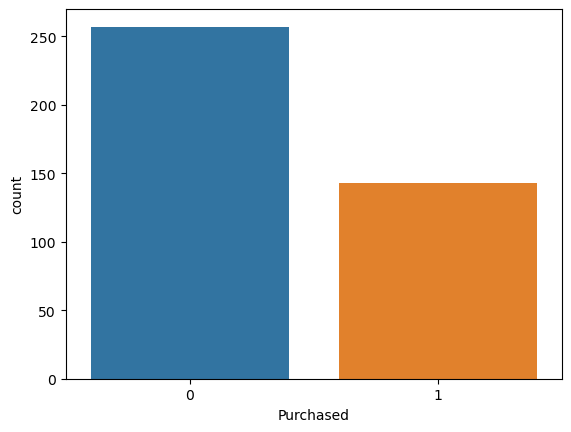

In [7]:
sns.countplot( x= df['Purchased'])

### Data Transformation

In [8]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [9]:
# 1 - Male , 0 - Female

def gender_transform(value):
    if value == 'Male':
        return 1
    if value == 'Female':
        return 0 

In [10]:
df['Gender'] = df['Gender'].apply(gender_transform)

In [11]:
df['Gender'].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

### Data Preparation

In [12]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [13]:
x = df.drop('User ID', axis=1)
y = df['Purchased']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 4)
(120, 4)
(280,)
(120,)


### Model Traning

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(x_test)

### Model Evaluation

In [18]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[83  0]
 [ 0 37]]


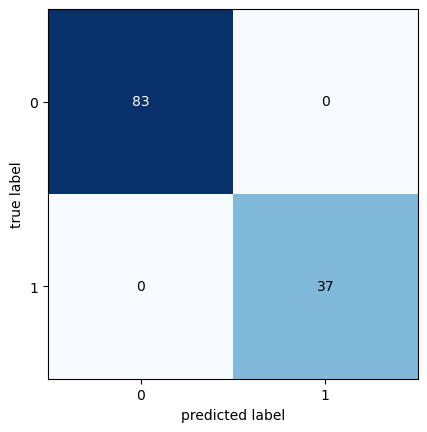

In [20]:
plot_confusion_matrix( conf_mat = cm);

In [24]:
print('True Negatives = ', cm[0][0])
print('False Positives = ', cm[0][1])
print('False Negatives = ', cm[1][0])
print('True Positives = ', cm[1][1])

True Negatives =  83
False Positives =  0
False Negatives =  0
True Positives =  37


In [25]:
print('Accuracy score : ', accuracy_score(y_test,y_pred))

Accuracy score :  1.0


In [26]:
print('Error Rate : ', (1 - accuracy_score(y_test,y_pred)))

Error Rate :  0.0


In [27]:
print('F1 score : ', f1_score(y_test,y_pred))

F1 score :  1.0


In [28]:
print('Precision score : ', precision_score(y_test,y_pred))

Precision score :  1.0


In [29]:
print('Recall score : ', recall_score(y_test,y_pred))

Recall score :  1.0


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        37

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

